In [1]:
from scipy.fft import fft, ifft, fftfreq
import numpy as np

In [2]:
data = np.load('/Volumes/MARI/ssdl_gps/correction_data/2018_2019/scaled_continuous_unique_correction_data_2018_2019_jan1_dec31_clipped_1_99.npz')
epochs = data['matching_epochs']
final_clock_bias = data['matching_clock_bias']
broadcast_clock_bias = data['matching_poly_values']
correction_value = data['correction_vals']

In [3]:
y = fft(correction_value)
y

array([1018823.93151862    -0.j        ,   -6946.40019491-33327.06909864j,
        -16860.05004375-10138.69209993j, ...,
        -21938.07500057 +1788.35776688j,  -16860.05004375+10138.69209993j,
         -6946.40019491+33327.06909864j])

In [4]:
sample_rate = 1 / 30.0  # 1 sample every 30 seconds

In [5]:
N = len(correction_value)
magnitude = np.abs(y)
freq = fftfreq(N, d=1/sample_rate)

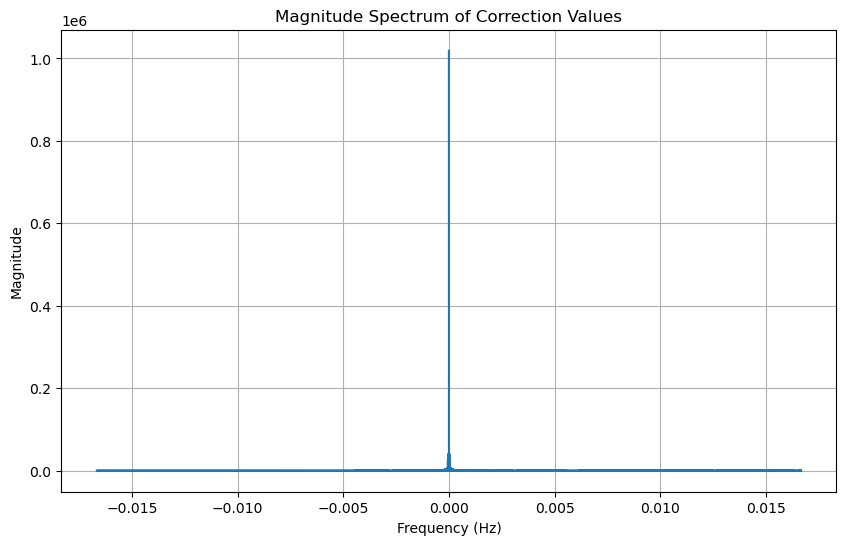

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()

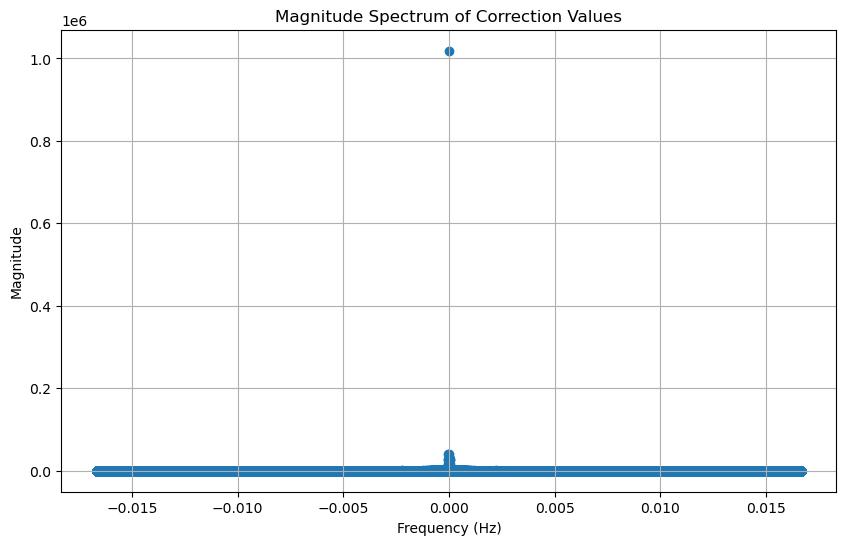

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values')
plt.grid(True)
plt.show()

In [8]:
nyquist = sample_rate / 2


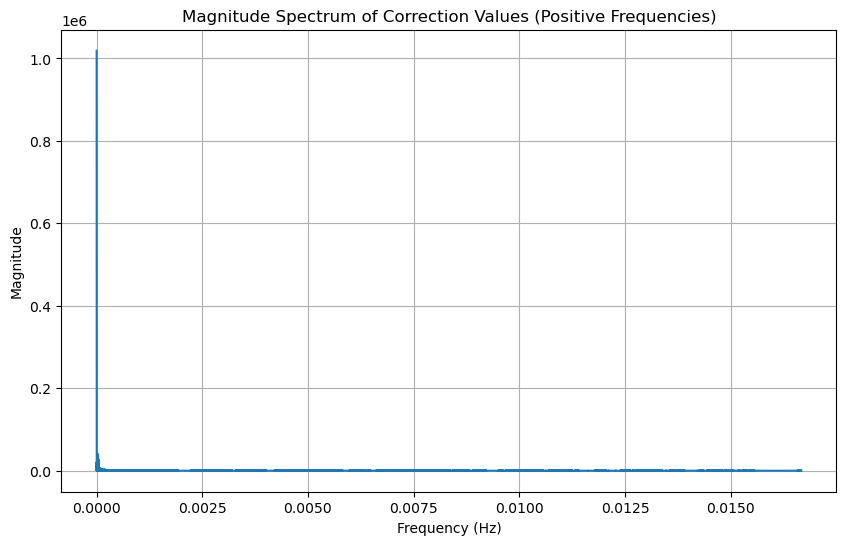

In [9]:
positive_freqs = freq[:N//2]
positive_magnitude = magnitude[:N//2]

plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Correction Values (Positive Frequencies)')
plt.grid(True)
plt.show()

In [ ]:
# from scipy.signal import butter, filtfilt

# # Define a low-pass filter
# def lowpass_filter(data, cutoff, fs, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

# # Apply the filter to correction_value
# filtered_correction_value = lowpass_filter(correction_value, cutoff=0.0167, fs=sample_rate)

# # Perform FFT on filtered data
# y_filtered = fft(filtered_correction_value)
# magnitude_filtered = np.abs(y_filtered)

# # Plot the magnitude spectrum of the filtered data
# plt.figure(figsize=(10, 6))
# plt.plot(positive_freqs, magnitude_filtered[:N//2])
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.title('Magnitude Spectrum of Filtered Correction Values')
# plt.grid(True)
# plt.show()